In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read in csv file
strawberry = pd.read_csv('firstsheet.csv', sep=',')

/mnt/job-temp/slphelps/5184679/ipykernel_297874/125465903.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  strawberry = pd.read_csv('firstsheet.csv', sep=',')


In [3]:
#check data
len(strawberry)
unique_types = strawberry['Type'].unique()
print(unique_types) 

['Spatial' 'Altitudinal' nan 'Drought']


In [19]:
# Create 3 data frames that correspond to the 3 sampling types
sp_df = strawberry[strawberry['Type'] == 'Spatial']
alt_df = strawberry[strawberry['Type'] == 'Altitudinal']
dr_df = strawberry[strawberry['Type'] == 'Drought']

In [5]:
# Create 3 subcategories within the altitudinal category that correspond to the three "Context" variables
alt_gc = alt_df[alt_df['Context'] == 'CG']
print(len(alt_gc))
alt_chg = alt_df[alt_df['Context'] == 'CHG']
print(len(alt_chg))
alt_chh = alt_df[alt_df['Context'] == 'CHH']
print(len(alt_chh))

492
134
73


In [6]:
# Create 3 subcategories within the spatial category that correspond to the three "Context" types
sp_gc = sp_df[sp_df['Context'] == 'CG']
print(len(sp_gc))
sp_chg = sp_df[sp_df['Context'] == 'CHG']
print(len(sp_chg))
sp_chh = sp_df[sp_df['Context'] == 'CHH']
print(len(sp_chh))

51135
23388
8316


In [7]:
# Create 3 subcategories within the drought category that correspond to the three "Context" types
dr_gc = dr_df[dr_df['Context'] == 'CG']
print(len(dr_gc))
dr_chg = dr_df[dr_df['Context'] == 'CHG']
print(len(dr_chg))
dr_chh = dr_df[dr_df['Context'] == 'CHH']
print(len(dr_chh))

13
10
0


In [8]:
# Covert the subcategory counts for each major category to log10 to be represented graphically 
altitide_counts = 492, 134, 73
log_altitude = [np.log10(n) for n in altitide_counts]
print(log_altitude)

drought_counts = 13, 10, 0
log_drought = [np.log10(n) for n in drought_counts]
print(log_drought)

space_counts = 51135, 23388, 8316
log_space = [np.log10(n) for n in space_counts]
print(log_space)


[2.6919651027673606, 2.1271047983648077, 1.863322860120456]
[1.1139433523068367, 1.0, -inf]
[4.708718260284573, 4.368993085165246, 3.9199144806594317]


/mnt/job-temp/slphelps/5184679/ipykernel_297874/3300685238.py:7: RuntimeWarning: divide by zero encountered in log10
  log_drought = [np.log10(n) for n in drought_counts]


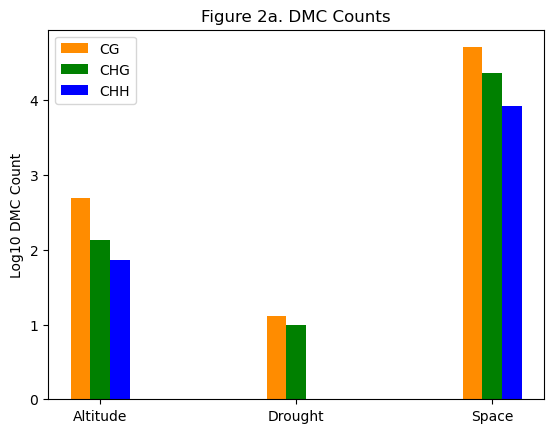

In [9]:
# Create a bar graph that displays all three categories and the contexts within each category 
categories = ['Altitude', 'Drought', 'Space'] # set category variables
context = ['CG', 'CHG', 'CHH'] # set context variables
values = np.array([
    [2.6919651027673606, 2.1271047983648077, 1.863322860120456],  # context values for altitude
    [1.1139433523068367, 1.0, 0.00000000001],                     # context values for drought
    [4.708718260284573, 4.368993085165246, 3.9199144806594317]])   # context values for space
bar_width = 0.1
# Create an index of spaced positions along the x-axis for each category/type position 
index = np.arange(len(categories)) 

# Specify the color of each sub category to match that of the actual figure
context_colors = {'CG': 'darkorange',
    'CHG': 'green',
    'CHH': 'blue'}
# this loop creates a bar for each context and type combination
for i, category in enumerate(context): 
    plt.bar(index + i * bar_width, values[:, i], bar_width, label=category, color=context_colors[category])
    # plot a bar chart for each category and context
# Define axes and chart labels
plt.ylabel('Log10 DMC Count')
plt.title('Figure 2a. DMC Counts')
plt.xticks(index + bar_width, categories)
plt.legend()
plt.savefig('Figure2a.png')
plt.show()

In [10]:
# Create figure 2b
types = strawberry['Type'].unique()
print(types)
contexts = strawberry['Context'].unique()
print(contexts)
strawberry['absolute.meth'] = strawberry['meth.diff'].abs()

['Spatial' 'Altitudinal' nan 'Drought']
['CHG' 'CG' 'CHH' nan]


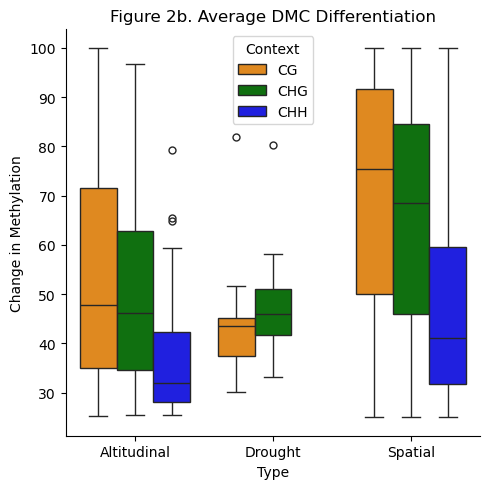

In [11]:
hue_order = ['CG', 'CHG', 'CHH'] # order the context variables to match the original figure
order = ['Altitudinal', 'Drought', 'Spatial'] # order the type variables to match the original figure
# create a categorical plot of the box plots ordered by type along the x-axis and context within each type
sns.catplot(x='Type', y='absolute.meth', hue='Context', kind='box', data=strawberry, order=order,
            hue_order=hue_order, height=5, aspect=1, palette= context_colors, legend_out=False)
plt.ylabel('Change in Methylation')
plt.title('Figure 2b. Average DMC Differentiation')
plt.tight_layout()
plt.savefig('Figure2b.png')
plt.show()